In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

In [3]:
from featureExtraction import *
from dataAnalyzer import *
from private_tool import *
from dataHandler import *

In [4]:
warnings.filterwarnings('ignore')

In [5]:
experimentNum = 9
Experiments = [MotorImageryDataset(parentDirectory(dir=currDir, separator="\\", n=1)+'/bcicompetitionIV2a/A0'+str(i+1)+'T.npz') for i in range(experimentNum)]

In [6]:
channels = list(range(25))
samplingRate = 250 #Hz
trialsByClasses = np.array([i.get_trials_by_classes(channels=channels) for i in Experiments])

In [7]:
for i in range(len(trialsByClasses)):
    for j in trialsByClasses[i].keys():
        for k in range(len(trialsByClasses[i][j])):
            for l in range(len(trialsByClasses[i][j][k])):
                trialsByClasses[i][j][k][l] = trialsByClasses[i][j][k][l]

In [8]:
channelNum = len(channels)
m = len(trialsByClasses[0]["left"])
channelNum, m

(25, 25)

In [9]:
squaredBandpassedTrialsByClasses = [{i:[[] for _ in range(channelNum)] for i in j.mi_types.values()} for j in Experiments]
for k in range(experimentNum):
    for key in trialsByClasses[k].keys():
        for i in range(channelNum):
            squaredBandpassedTrialsByClasses[k][key][i] = np.abs([bandpass_filter(data=trialsByClasses[k][key][i][j], 
                                                                sample_rate=samplingRate, 
                                                                cutoff_low=8, 
                                                                cutoff_high=12) for j in range(len(trialsByClasses[k][key][i]))])

In [60]:
ERD_ERS = [{i:[[] for _ in range(channelNum)] for i in j.mi_types.values()} for j in Experiments]

for k in range(experimentNum):
    for key in ['left', 'right', 'foot', 'tongue']:
        for i in range(channelNum):
            for j in range(1875):
                R = np.mean(np.array([squaredBandpassedTrialsByClasses[k][key][k][l][j] for l in range(49)]))
                ERD_ERS[k][key][i].append(np.square((squaredBandpassedTrialsByClasses[k][key][i][0][j] - R)/(R)))
        print(k, key)

0 left
0 right
0 foot
0 tongue
1 left
1 right
1 foot
1 tongue
2 left
2 right
2 foot
2 tongue
3 left
3 right
3 foot
3 tongue
4 left
4 right
4 foot
4 tongue
5 left
5 right
5 foot
5 tongue
6 left
6 right
6 foot
6 tongue
7 left
7 right
7 foot
7 tongue
8 left
8 right
8 foot
8 tongue


In [61]:
len(ERD_ERS[0]["left"][0])

1875

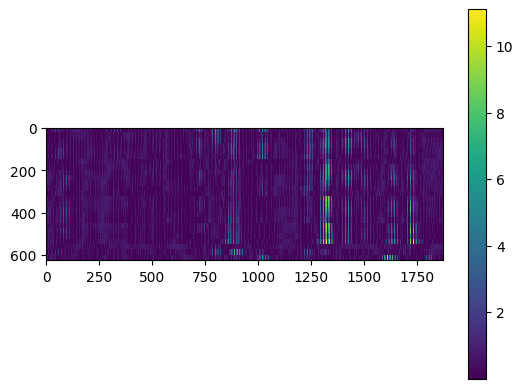

In [62]:
# 2차원 리스트 생성 (임의의 데이터) 
data = []
for i in range(25):
    for _ in range(25):
        # print(ERD_ERS[4]["left"][i])
        data.append(ERD_ERS[4]["left"][i])

# NumPy 배열로 변환
data_array = np.array(data)

# 히트맵 그리기
plt.imshow(data_array, cmap='viridis', interpolation='nearest')

# 컬러 바 추가
plt.colorbar()

# plt.ylim(0, 25)
# 그래프 보여주기
plt.show()